# Day 28: Scaling Implementation Mastery (Type A)

In [1]:
# Standard Week 3 data load (use in all Foundation Drilling)
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)
df = housing.frame
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Verify
print(df.shape)  # (20640, 9)
print(df.columns.tolist())

(20640, 9)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


## FOUNDATION DRILLING

### Part 1: Python Pattern — String .join()

In [2]:
# Basic pattern
# separator.join(iterable_of_strings)

# Real example
words = ['hello', 'world']
sentence = ' '.join(words)  # 'hello world'
# Translation: "Put separator between each element, combine into one string"
print(words)
print(sentence)

# Variations
# csv_line = ','.join(['a', 'b', 'c'])       # 'a,b,c'
# path = '/'.join(['home', 'user', 'data'])  # 'home/user/data'
# no_sep = ''.join(['a', 'b', 'c'])          # 'abc'


['hello', 'world']
hello world


In [3]:
# Task 1: Join a list of feature names with ', ' to create a readable string

features = ['MedInc', 'HouseAge', 'bedroom_ratio']
# Your code here — result should be: 'MedInc, HouseAge, bedroom_ratio'
task1 = ', '.join(features)
print(task1)

MedInc, HouseAge, bedroom_ratio


In [4]:
# Task 2: Join without separator to concatenate characters

chars = ['s', 'c', 'a', 'l', 'e', 'd']
# Your code here — result should be: 'scaled'

task2 = ''.join(chars)
print(task2)

scaled


In [5]:
# Task 3: Create a file path from parts

parts = ['home', 'user', 'data', 'file.csv']
# Join with '/' to get 'home/user/data/file.csv'

task3 = '/'.join(parts)
print(task3)

home/user/data/file.csv


### Part 2: Module 3 Drilling

**Feature Engineering (from memory, no looking back):**

**Task: Write code to create bedroom_ratio from California Housing data**

In [6]:
df['bedroom_ratio'] = df['AveBedrms'] / df['AveRooms']

**Task: Write code to create rooms_per_person from California Housing data**

In [7]:
df['rooms_per_person'] = df['AveRooms'] / df['AveOccup']

**Scaling Workflow Recitation (verbal/written):**

Without looking at notes, write the 4-step scaling workflow:

1. train_test_split
2. scaler.fit(X_train)
3. scaler.transform(X_train)
4. scaler.transform(X_test)

Then answer:

- Why must step 1 come before step 2? testing data must be set aside before anything else, in order to ensure the model sees untouched and unseen data, in order to determine it's quality of prediction once it is shipped and actually working on new and unseen data
- What's the difference between fit_transform() and transform()? fit_transform() learns scaling parameters (mean, std) from X_train AND applies them. transform() applies those SAME learned parameters without learning new ones. This ensures test data is scaled using only training statistics.

### Part 3: Visualization Drill

**Task:** Create histogram of MedInc with mean line

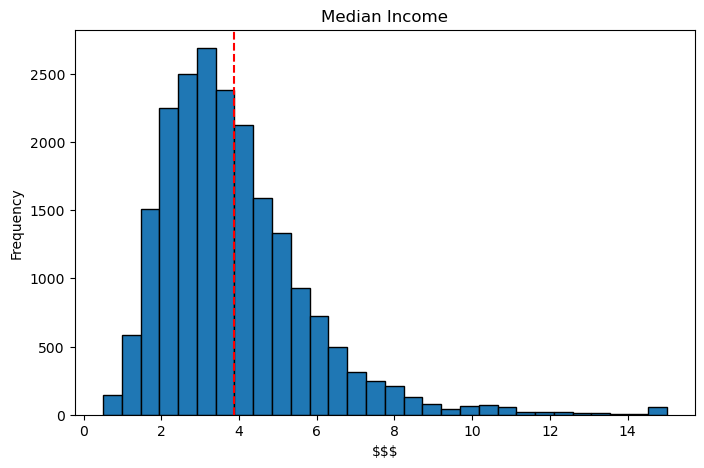

In [8]:
# Pattern (from memory):
# plt.hist(df['column'], bins=30)
# plt.axvline(df['column'].mean(), color='red', linestyle='--')
# plt.title(), plt.xlabel()

import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))
plt.hist(df['MedInc'], bins=30, edgecolor='black')
plt.axvline(df['MedInc'].mean(), color='red', linestyle='--')
plt.title('Median Income')
plt.xlabel('$$$')
plt.ylabel('Frequency')
plt.show()

## BLOCK 1: First Scaling Implementation

**Goal:** Execute complete scaling pipeline from data load to evaluation.

In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,bedroom_ratio,rooms_per_person
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.146591,2.732919
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.155797,2.956685
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.129516,2.957661
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.184458,2.283154
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.172096,2.879646


### Complete Scaling Pipeline (First Implementation)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# Define features (your 8-feature reduced model from Day 26)
feature_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                'Latitude', 'Longitude', 'bedroom_ratio', 'rooms_per_person']
X = df[feature_cols]
y = df['MedHouseVal']

# Step 1: Split FIRST (before any scaling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Create scaler
scaler = StandardScaler()

# Step 3: fit_transform on training data
# - Learns mean and std from X_train
# - Applies transformation: (x - mean) / std
X_train_scaled = scaler.fit_transform(X_train)

# Step 4: transform on test data (NO fit!)
# - Uses mean and std learned from X_train
# - Test data never influences scaling parameters
X_test_scaled = scaler.transform(X_test)

# Verify shapes unchanged
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

# Verify scaling worked (first feature should have mean≈0, std≈1 on training)
print(f"\nX_train_scaled first feature - mean: {X_train_scaled[:, 0].mean():.4f}, std: {X_train_scaled[:, 0].std():.4f}")

X_train_scaled shape: (16512, 8)
X_test_scaled shape: (4128, 8)

X_train_scaled first feature - mean: -0.0000, std: 1.0000


**Translation:** "Split first so scaler never sees test data. fit_transform learns parameters AND applies them to training. transform applies those SAME parameters to test. Scaler becomes a trained object that remembers what it learned."

**Fit Model and Evaluate:**

In [11]:
# Fit model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Predict and evaluate
predictions_scaled = model_scaled.predict(X_test_scaled)
r2_scaled = r2_score(y_test, predictions_scaled)
mae_scaled = mean_absolute_error(y_test, predictions_scaled)

print(f"\nScaled Model Results:")
print(f"R²: {r2_scaled:.4f}")
print(f"MAE: ${mae_scaled * 100000:,.0f}")



Scaled Model Results:
R²: 0.6511
MAE: $48,709


## BLOCK 2: Variations and Comparisons

### Task 1: Compare to Unscaled Model

**Task prompt:** Fit LinearRegression on the UNSCALED X_train and X_test. Compare R² and MAE to scaled version.

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"\nUN-Scaled Model Results:")
print(f"R²: {r2:.4f}")
print(f"MAE: ${mae * 100000:,.0f}")


UN-Scaled Model Results:
R²: 0.6511
MAE: $48,709


**Questions after completing:**

- Did scaling improve LinearRegression performance? No
- Why or why not? LinearRegression uses a closed-form solution (Normal Equation) that directly calculates optimal coefficients. The math is scale-invariant — when features scale down, coefficients scale up proportionally, keeping predictions unchanged

### Task 2: Implement MinMaxScaler Version
**Task prompt:** Replace StandardScaler with MinMaxScaler. Run the complete pipeline again.

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler
minmax_scaler = MinMaxScaler()

# FIX: Use minmax_scaler, not scaler
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# Verification
print(f"X_train_minmax shape: {X_train_minmax.shape}")
print(f"X_test_minmax shape: {X_test_minmax.shape}")
print(f"\nX_train_minmax first feature - mean: {X_train_minmax[:, 0].mean():.4f}, std: {X_train_minmax[:, 0].std():.4f}")

# Check actual range
print(f"Min value: {X_train_minmax[:, 0].min():.4f}")  # Should be 0.0000
print(f"Max value: {X_train_minmax[:, 0].max():.4f}")  # Should be 1.0000

# Fit model
model_minmax = LinearRegression()
model_minmax.fit(X_train_minmax, y_train)

# Evaluate
predictions_minmax = model_minmax.predict(X_test_minmax)
r2_minmax = r2_score(y_test, predictions_minmax)
mae_minmax = mean_absolute_error(y_test, predictions_minmax)

print(f"\nMinMaxScaled Model Results:")
print(f"R²: {r2_minmax:.4f}")
print(f"MAE: ${mae_minmax * 100000:,.0f}")

X_train_minmax shape: (16512, 8)
X_test_minmax shape: (4128, 8)

X_train_minmax first feature - mean: 0.2332, std: 0.1313
Min value: 0.0000
Max value: 1.0000

MinMaxScaled Model Results:
R²: 0.6511
MAE: $48,709


**Questions after completing:**

- What range are your scaled features in now? 0-1
- Compare R² to StandardScaler version: identical
- Which would you choose for this data and why? Because LinearRegression is not impacted by scaling, I would not choose any scaling method. It adds work and compute, without adding any value to the model or the results

### Task 3: Visualize Before/After Scaling

**Task prompt:** Create a 2x2 subplot showing MedInc distribution:

- Top left: Original MedInc
- Top right: StandardScaler MedInc
- Bottom left: Original AveRooms
- Bottom right: StandardScaler AveRooms

**Pattern scaffold:**

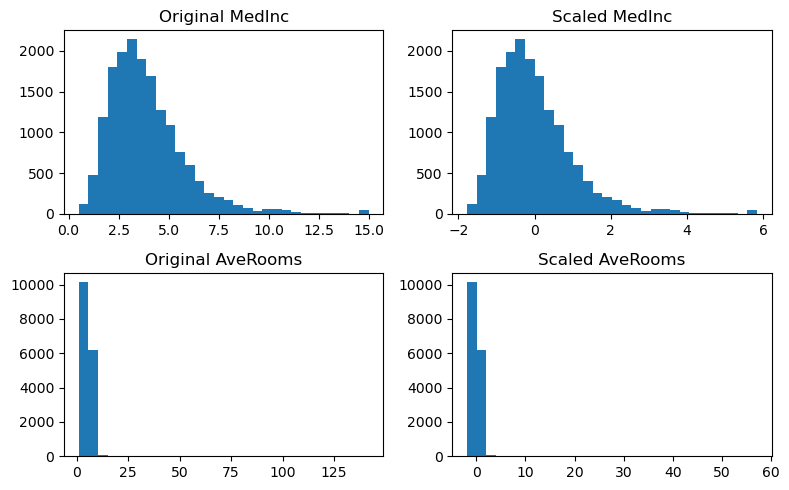

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# Top left: Original MedInc
axes[0, 0].hist(X_train['MedInc'], bins=30)
axes[0, 0].set_title('Original MedInc')

# Top right: Scaled MedInc (column 0)
# Your code
axes[0, 1].hist(X_train_scaled[:, 0], bins=30)
axes[0, 1].set_title('Scaled MedInc')

# Bottom left: Original AveRooms
# Your code
axes[1, 0].hist(X_train['AveRooms'], bins=30)
axes[1, 0].set_title('Original AveRooms')

# Bottom right: Scaled AveRooms (column 2)
# Your code
axes[1, 1].hist(X_train_scaled[:, 2], bins=30)
axes[1, 1].set_title('Scaled AveRooms')

plt.tight_layout()
plt.savefig('../../visuals/daily_work_visuals/scaled_unscaled_subplots.png')
plt.show()


### Task 4: Coefficient Interpretability

**Task prompt:** Compare coefficients from scaled vs unscaled LinearRegression models.

In [21]:
# Create DataFrame comparing coefficients
coef_comparison = pd.DataFrame({
    'feature': feature_cols,
    'coef_unscaled': model.coef_,
    'coef_scaled': model_scaled.coef_
})
print(coef_comparison)


            feature  coef_unscaled  coef_scaled
0            MedInc       0.414048     0.788445
1          HouseAge       0.009318     0.117430
2          AveRooms      -0.060173    -0.143650
3         AveBedrms      -0.520662    -0.225552
4          Latitude      -0.419678    -0.896684
5         Longitude      -0.420122    -0.842593
6     bedroom_ratio       4.176515     0.242211
7  rooms_per_person       0.455994     0.513351


**Questions:**

- Which coefficients changed the most? bedroom_ratio dropped 94% (from 4.177 to 0.242) and HouseAge increased 13x (from 0.009 to 0.117)
- Why are scaled coefficients more comparable to each other? All features now have the same scale (std=1), so coefficients show relative importance per standard deviation change, making direct comparison valid.
- Which feature has the strongest relationship with price after scaling? Latitude (|-0.897| = 0.897), followed by Longitude (0.843) and MedInc (0.788). Geographic location dominates price prediction.

## END OF DAY: Reflection

**Technical check:**

**1. Can you write the 4-step scaling workflow without looking?**
    train_test_split, scaler.fit(X_train) — learn parameters, scaler.transform(X_train) — apply to training, scaler.transform(X_test) — apply to test

**2. What's the difference between fit_transform() and transform()?**
   fit_transform() learns scaling parameters (mean, std) from training data AND applies the transformation. transform() applies those same learned parameters to new data without learning new ones.

**3. When would you choose MinMaxScaler over StandardScaler?**
   MinMaxScaler when data is clean with no extreme outliers and you need [0,1] bounds. StandardScaler is more robust to outliers because it uses mean/std instead of min/max.

**Metacognitive check:**

**4. Did scaling change model performance? Why does that make sense?**
   No; linear regression is a closed-form solution, it arrives at the same results regardless of the data's scale

**5. How did seeing the formulas in action reinforce Day 27 concepts?**
   To be honest, although today's exercises gave me some good exposure to these patterns and syntaxes in practice, they didn't really help improve my understanding of their function. Because this dataset was unphased by any of the new concepts, it didn't give me a chance to 'see' how they make data more actionable.